# Transcript from lecture 5, January 26, 2023


In [2]:
import sys

########################################
# Change the string in the line below! #
########################################
sys.path.append("/Users/gilbert/Documents/CS111-2023-winter/Python") 

import os
import time
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import linalg as spla
import scipy.sparse
import scipy.sparse.linalg
from scipy import integrate
import networkx as nx
import cs111

##########################################################
# If this import for matplotlib doesn't work, try saying #
#   conda install -c conda-forge ipympl                  #
# at a shell prompt on your computer                     #
##########################################################
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d




np.set_printoptions(precision = 4)

# Building the temperature matrix

## Small example: k = 4, n = 16 unknowns

In [ ]:
cs111.make_A_small?

In [3]:
A = cs111.make_A_small()
print(A)

[[ 4. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  4. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  4. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  4.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  4. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0. -1.  4.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  4. -1.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.  0. -1.  4.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  4. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0. -1.  4. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0. -1.  4. 

## Matrix A is sparse (mostly zeros)

In [4]:
A.shape

(16, 16)

In [5]:
np.count_nonzero(A)

64

In [6]:
b = cs111.make_b_small()
print(b)

[ 64. 212.  32.  64.  32.   0.   0.  32.  32.   0.   0.  32.  64.  32.
  32.  64.]


In [7]:
x = npla.solve(A,b)

In [8]:
x.shape

(16,)

In [9]:
print(x)

[50.3818 93.0364 52.7818 38.8455 44.4909 56.9818 47.2455 38.6    38.6
 43.1545 40.6182 36.3091 34.7545 36.4182 35.7636 34.0182]


In [10]:
T = x.reshape(4,4)
print(T)

[[50.3818 93.0364 52.7818 38.8455]
 [44.4909 56.9818 47.2455 38.6   ]
 [38.6    43.1545 40.6182 36.3091]
 [34.7545 36.4182 35.7636 34.0182]]


Text(0.5, 1.0, '2-dimensional Poisson equation (temperature)')

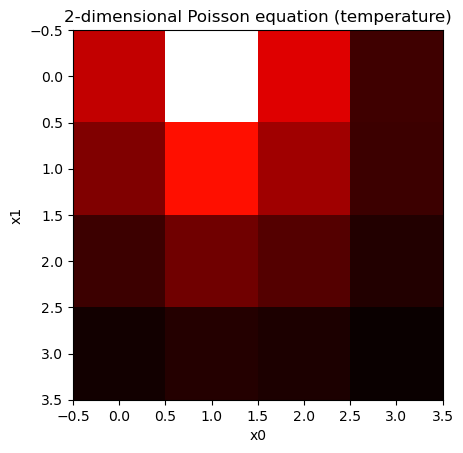

In [11]:
plt.figure()
plt.imshow(T, cmap=cm.hot)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('2-dimensional Poisson equation (temperature)')

## Large example, k = 100 (so n = 10,000), using sparse data structure

In [12]:
k = 100
A = cs111.make_A(k)
b = cs111.make_b(k, top = cs111.radiator(k))

In [13]:
A.shape

(10000, 10000)

In [14]:
x = scipy.sparse.linalg.spsolve(A,b) # ugly!

In [15]:
x.shape

(10000,)

Text(0.5, 1.0, '2-dimensional Poisson equation (temperature)')

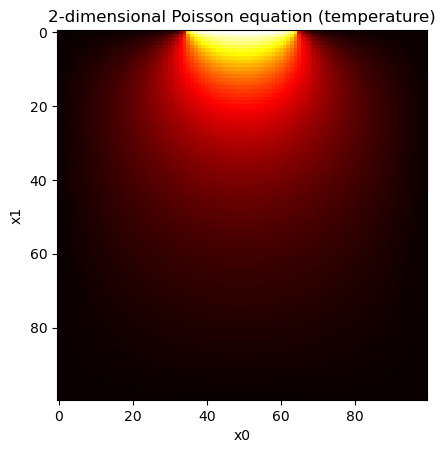

In [16]:
T = x.reshape(k, k)
plt.figure()
plt.imshow(T, cmap=cm.hot)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('2-dimensional Poisson equation (temperature)')